# LA Mayor Candidate: Crime Analysis

In [2]:
%matplotlib notebook

In [3]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Import files
crime_data_to_load= "../Resources/crime-data-from-2010-to-present.csv"

crime_data_df=pd.read_csv(crime_data_to_load)

crime_data_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


# Summary Statistics 

In [5]:
#Total number of unique area names
area_name_count=len(crime_data_df["Area Name"].unique())
area_name_count

21

In [6]:
#Total number of Crime Code Description
crime_count=len(crime_data_df["Crime Code Description"].unique())
crime_count

140

In [18]:
#Find the most common geographical area name in LA County
most_common_area=crime_data_df["Area Name"].value_counts()
most_common_area.head(13)

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Name: Area Name, dtype: int64

In [19]:
#What area name has the least committed amount of crimes?
least_common_area=crime_data_df["Area Name"].value_counts(ascending=True)
least_common_area.head(13)

Hollenbeck     73514
Foothill       75348
Wilshire       82575
West LA        83736
Rampart        84241
West Valley    84521
Harbor         86972
Olympic        89634
Central        90489
Devonshire     91347
Topanga        92262
Hollywood      92742
Newton         94123
Name: Area Name, dtype: int64

In [9]:
#Most common types of crimes and least type of crimes in LA County 
crime_code_count=crime_data_df['Crime Code'].value_counts(ascending=False)
crime_code_count

624    180434
330    153451
510    151622
440    141489
310    140926
        ...  
432         3
926         2
906         2
453         1
905         1
Name: Crime Code, Length: 140, dtype: int64

In [10]:
#low_crime_count=crime_data_df[crime_data_df['Crime Code'].groupby(['Hollenbeck'])['DR Number'].count()
#sorted_low=low_crime_count.sort_values(ascending=False)
#sorted_low

In [12]:
#Find the highest amount of homicides by Area Name
homicide_count=crime_data_df[crime_data_df['Crime Code']==110].groupby(['Area Name'])['DR Number'].count()
sorted_homicide=homicide_count.sort_values(ascending=False)
sorted_homicide

Area Name
77th Street    422
Southeast      363
Newton         229
Southwest      212
Hollenbeck     157
Harbor         156
Rampart        139
Mission        128
Foothill       111
Central         98
Northeast       86
Olympic         79
N Hollywood     76
Hollywood       66
Van Nuys        58
Wilshire        55
West Valley     52
Pacific         48
Devonshire      39
Topanga         36
West LA         24
Name: DR Number, dtype: int64

In [13]:
crime_max=crime_data_df.groupby("Area Name")["Crime Code"].max()

merge_max=pd.merge(crime_data_df, crime_max, how="right", on=["Area Name", "Crime Code"])

# Statistics of Crime Offenders' Age committing Homicide

In [15]:
#Diplay a data table of the mean, median, and SEM of crime offenders' age who committed homicide
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).sem()


summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                          "Victim Age Std. Err":sem})
#colors=['blue', 'red', 'yellow']
#df_colors=[mean, median, sem]
#for i, df_colors in enumerate(df_colors):
    #df_colors.plot(kind="bar", x="Area Name", y="Victim Age", colors=colors[i])
    #plot.show()
summary_stat

,Mean of Victim Age,Median of Victim Age,Victim Age Std. Err
Area Name,,,
77th Street,31.594264,31.0,0.053521
Central,34.387937,34.0,0.060880
Devonshire,33.869388,34.0,0.074083
Foothill,31.350666,31.0,0.076483
Harbor,30.279872,31.0,0.074854
Hollenbeck,27.200397,27.0,0.078968
Hollywood,29.643117,29.0,0.063205
Mission,29.961075,30.0,0.065289
N Hollywood,31.773088,32.0,0.063123


<IPython.core.display.Javascript object>


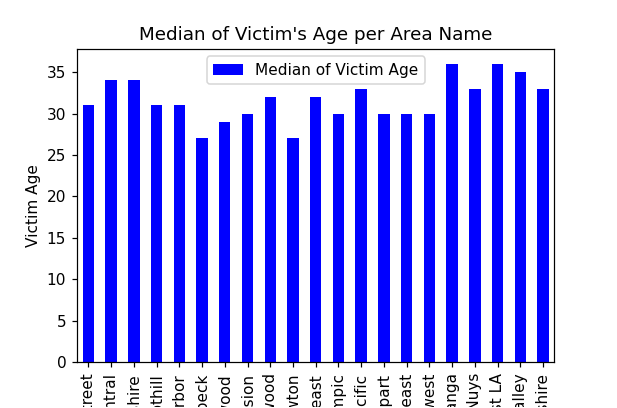

Text(0.5, 1.0, "Median of Victim's Age per Area Name")

In [80]:
#Display bar graph of the Median of Victim Age
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
median_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=median_stat.plot.bar(color='b')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Median of Victim's Age per Area Name")

<IPython.core.display.Javascript object>


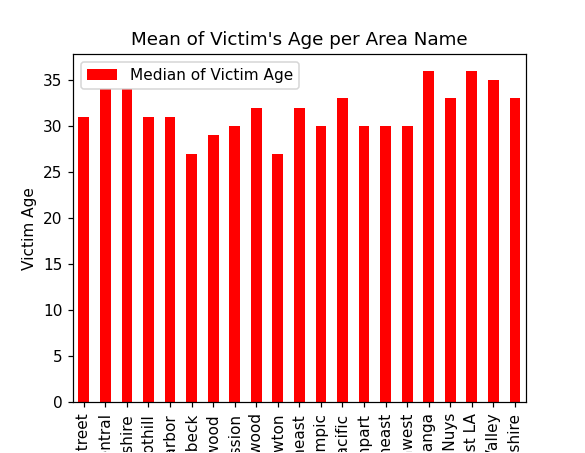

Text(0.5, 1.0, "Mean of Victim's Age per Area Name")

In [82]:
#Display bar graph of the Mean of Victim Age
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
mean_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=mean_stat.plot.bar(color='r')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Mean of Victim's Age per Area Name")

# Gender Distribution

In [50]:
#Provide a dataset of the crimes committed by men vs women 
gender_data_df=crime_data_df["Victim Sex"].value_counts()
gender_data_df

M    920405
F    840397
X     46409
H        70
N        17
-         1
Name: Victim Sex, dtype: int64

In [68]:
#Rename Gender Columns, Combine X, H, N
crime_data_df.loc[crime_data_df["Victim Sex"].isin(["X", "H", "N"]),"Victim Sex"]= "Other"

gender_data_df=crime_data_df["Victim Sex"].value_counts()

new_gender_data_df=gender_data_df.rename({"M":"Male", "F":"Female"
                                                 })
#Drop "-" Column 
del new_gender_data_df["-"]
new_gender_data_df

Male      920405
Female    840397
Other      46496
Name: Victim Sex, dtype: int64

<IPython.core.display.Javascript object>


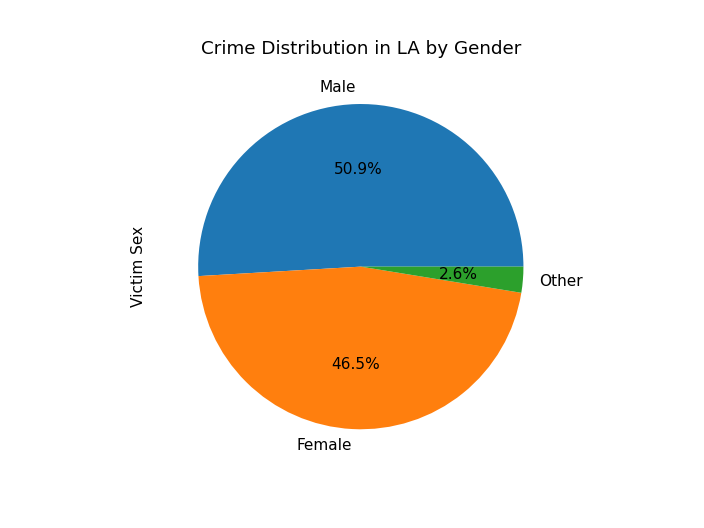

In [71]:
#Generate a pie chart showing the distribution of male vs. female vs. other 
pie_chart=new_gender_data_df
pie_chart.plot.pie(autopct= "%1.1f%%")
plt.title('Crime Distribution in LA by Gender')
plt.show()